In [1]:
import numpy as np
import pandas as pd
from sko.ACA import ACA_TSP
from utils import parse_UK_Data, generate_coordinates
from scipy import spatial
import matplotlib.pyplot as plt


dataset_path = "../datasets/UK10_1.txt"

meta_data, distance_data, station_data = parse_UK_Data(dataset_path)

In [2]:
meta_data

,Customer Amount,Vehicle Curb Weight(kg),Max Load(kg),Minimum Speed(km/h),Maximum Speed(km/h)
0,10,6350,3650,20,90


In [3]:
distance_data

,0,1,2,3,4,5,6,7,8,9,10
0,0,41150,25680,54200,95380,15910,88960,74120,26010,88181,66070
1,40660,0,51980,32800,99870,42210,75660,63880,24350,72070,26250
2,25010,51780,0,61520,74050,12890,69270,52590,42910,73400,76700
3,54270,32750,61560,0,77030,51930,42930,31920,49480,39500,29500
4,94930,100030,74070,76930,0,81260,55600,46100,111960,61700,106350
5,15830,42600,12880,52340,81050,0,78000,61320,33730,82130,67520
6,88751,75700,69300,43030,55210,78040,0,17200,90550,6520,68800
7,73340,63440,52480,31830,46430,61220,17130,0,75520,21260,61250
8,25990,24350,43780,49530,111730,34010,90550,75740,0,88960,48920
9,88411,71740,73420,39430,61390,82160,6550,21320,88830,0,64010


In [4]:
station_data

,City Name,Demand(kg),Ready Time(sec),Due Time(sec),Service Time(sec)
0,Kingston_upon_Hull,0,0,32400,0
1,Pocklington,721,2171,22139,1442
2,Brough,814,644,21053,1628
3,Selby,620,1049,20424,1240
4,Boughton,311,5119,24241,622
5,Barton_upon_Humber,167,2338,21697,334
6,Darfield,513,3675,24120,1026
7,Bentley,568,4401,25046,1136
8,Watton,763,3485,24335,1526
9,Cudworth,558,3740,24049,1116


In [5]:
num_points = station_data.shape[0]
distance_matrix = distance_data.to_numpy()


def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

In [6]:
#station_coordinates = generate_coordinates(station_data, to_csv=True, filename=dataset_path)
#station_coordinates = generate_coordinates(station_data)
station_coordinates = pd.read_csv('_coordinates.csv', encoding='utf-8')
points_coordinate = station_coordinates[["lat", "long"]].to_numpy()

In [7]:
aca = ACA_TSP(func=cal_total_distance, n_dim=11,
              size_pop=50, max_iter=200,
              distance_matrix=distance_matrix)

best_x, best_y = aca.run()


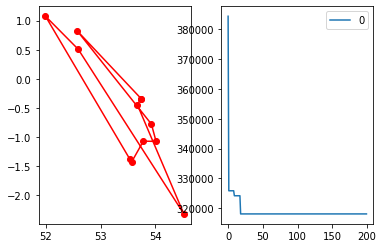

In [8]:
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_x, [best_x[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
pd.DataFrame(aca.y_best_history).cummin().plot(ax=ax[1])
plt.show()

In [12]:
import geoplot as gplt
import geopandas as gpd

contiguous_england = gpd.read_file(gplt.datasets.get_path('contiguous_uk'))
gplt.polyplot(contiguous_england)


ValueError: The dataset_name value 'contiguous_uk' is not in the list of valid names.